# [모듈 1.1] 데이터 세트 이해 및 탐색

이 노트북은 아래와 같은 작업을 합니다. 전체 워크샵의 실행에는 영향을 안주지만 데이터 이해를 하는데 도움을 줍니다.

1. 데이터 세트 설명
2. 데이터 세트 로딩
3. 데이터 세트 탐색

---
### 노트북 커널
- 이 워크샵은 노트북 커널이 `conda_python3` 를 사용합니다. 다른 커널일 경우 변경 해주세요.
---
## 1. 데이터 세트 설명
- 데이터 세트는 블로그 [Architect and build the full machine learning lifecycle with AWS: An end-to-end Amazon SageMaker demo](https://aws.amazon.com/blogs/machine-learning/architect-and-build-the-full-machine-learning-lifecycle-with-amazon-sagemaker/) 에서 사용한 데이터를 사용합니다. 블로그에서는 데이터 세트에 대해서 이렇게 설명 합니다.
    - "자동차 보험 청구 사기를 탐지를 위해서 블로그 저자가 데이터를 합성해서 만든 고객과 클레임의 데이터 세트를 사용합니다."

### Claims 데이터 컬럼
- fraud: 
    - 보험 청구의 사기 여부 입니다. 1 이면 사기, 0 이면 정상 청구 입니다.
- driver_relationship: 
    - 보험 계약자와 운전자와의 관계 입니다. Self, Spouse, Child, Other 값이 존재 합니다.
- incident_type: 
    - 사고의 종류를 기술합니다. Collision, Break-in, Theft 값이 존재 합니다.
- incident_severity: 
    - 사고의 손실 정도 입니다. Minor, Major, Totaled 값이 존재 합니다.
- authorities_contacted: 
    - 어떤 관련 기관에 연락을 했는지 입니다. Police, Ambuylance, Fire, None 값이 존재 합니다.
- num_vehicles_involved: 
    - 몇 대의 자동차가 사고에 연관 되었는지 입니다. 1, 2, 3, 4, 5, 6 의 값이 있습니다.
- num_injuries: 
    - 몇 명이 상해를 입었는지를 기술합니다. 0, 1, 2, 3, 4, 의 값이 있습니다.
- num_witnesses: 
    - 몇 명의 목격자가 있었는지를 기술합니다. 0, 1, 2, 3, 4, 5 의 값이 있습니다.
- police_report_available: 
    - 경찰 보고서가 존재하는지를 기술합니다. Yes, No 의 값이 있습니다.
- injury_claim: 
    - 상해에 대한 보험 청구액. \$5,500, \$70,700, \$100,700 등이 있습니다.    
- vehicle_claim: 
    - 자동차에 대한 보험 청구액. 값으로서, $1000, $17,638 등이 있습니다.
- total_claim_amount: 
    - 전체 보험 청구액 입니다. $21,400, $10,000 등이 있습니다.
- incident_month: 
    - 사고가 발생한 월을 의미합니다. 1~12 값이 존재 합니다.
- incident_day: 
    - 사고가 발생한 일자를 의미합니다. 1~31 값이 존재 합니다.
- incident_dow: 
    - 사고가 발생한 요일을 의미합니다. 0~6 값이 존재 합니다.
- incident_hour: 
    - 사고가 발생한 시간을 의미합니다. 0~23 값이 존재 합니다.
    


### Customers 데이터 컬럼
- customer_age: 
    - 고객의 나이를 의미 합니다.
- months_as_customer
    - 고객으로서의 가입 기간을 의미합니다. 단위는 월로서 11, 30, 31 등의 값이 존재 합니다.
- num_claims_past_year
    - 작년의 보험 청구 수를 의미 합니다. 0, 1, 2, 3, 4, 5, 6 의 값이 존재 합니다.
- num_insurers_past_5_years    
    - 과거 5년 동안의 보험 가입 회사 수를 의미 합니다. 1, 2, 3, 4, 5 의 값이 존재 합니다.
- policy_state
    - 보험 계약을 한 미국 주(State)를 의미 합니다. CA, WA, AZ, OR, NV, ID 가 존재 합니다.
- policy_deductable
    - 보험의 최소 자기 부담금 입니다. $750, $800 등이 있습니다.
- policy_annual_premium
    - 보험의 특약 가입에 대한 금액 입니다. $2000, $3000 등이 있습니다.
- policy_liability
    - 보험 청구의 한도를 의미 합니다. 예를 들어서 25/50 은  사람 당 상해 한도 $25,000, 사고 당 상해 한도가 $50,000 을  의미합니다. 25/50, 15/30, 30/60, 100/200 의 값이 존재 합니다.
- customer_zip
    - 고객의 집 주소 우편 번호를 의미합니다.
- customer_gender
    - 고객의 성별을 의미 합니다. Male, Female, Unkown, Other가 존재 합니다.
- customer_education    
    - 고객의 최종 학력을 의미합니다. Bachelor, High School, Advanced Degree, Associate, Below High School 이 존재 합니다.
- auto_year
    - 자동차의 년식을 의미 합니다. 2020, 2019 등이 있습니다.

---
## 2. 데이터 세트 로딩
- claims.csv, customers.csv를 로딩 합니다.
- 로딩시에 index_col = 0 을 통해서 policy_id 가 인덱스 컬럼으로 로딩 합니다.

시작하기 전에 pandas 패키지를 최신 버전으로 업데이트 합니다.

In [1]:
!pip install --upgrade pandas

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [2]:
# Importing required libraries.
import pandas as pd
import numpy as np

pd.options.display.max_columns=30 # 최대 30개의 컬럼을 보이게 하기

import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 
sns.set(color_codes=True)

# 데이터의 위치 폴더
data_dir = '../data'

In [3]:
df_claims = pd.read_csv(f"{data_dir}/claims.csv", index_col=0)
df_customers = pd.read_csv(f"{data_dir}/customers.csv", index_col=0)


---

## 3. 데이터 세트 탐색

## Claims 데이터 세트
- 5000개의 데이터 건수와 17개의 컬럼이 존재 합니다.

In [4]:
from IPython.display import display as dp
dp(df_claims)

,driver_relationship,incident_type,collision_type,incident_severity,authorities_contacted,num_vehicles_involved,num_injuries,num_witnesses,police_report_available,injury_claim,vehicle_claim,total_claim_amount,incident_month,incident_day,incident_dow,incident_hour,fraud
policy_id,,,,,,,,,,,,,,,,,
1,Spouse,Collision,Front,Minor,None,2,0,0,No,71600,8913.668763,80513.668763,3,17,6,8,0
2,Self,Collision,Rear,Totaled,Police,3,4,0,Yes,6400,19746.724395,26146.724395,12,11,2,11,0
3,Self,Collision,Front,Minor,Police,2,0,1,Yes,10400,11652.969918,22052.969918,12,24,1,14,0
4,Child,Collision,Side,Minor,None,2,0,0,No,104700,11260.930936,115960.930936,12,23,0,19,0
5,Self,Collision,Side,Major,Police,2,1,0,No,3400,27987.704652,31387.704652,5,8,2,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,Self,Collision,Front,Minor,None,2,0,3,No,15700,1494.409549,17194.409549,8,7,2,5,1
4997,Self,Collision,Side,Minor,None,2,0,1,No,34900,14837.909976,49737.909976,1,10,3,13,0
4998,Self,Collision,Front,Minor,None,1,0,0,No,11700,12421.253027,24121.253027,6,3,0,7,0


#### 데이터 컬럼의 Non-Null 개수와 변수 타입을 보여 줍니다. 
- [중요] Non-Null Count 가 5000 이 아닌 것은 Null 데이터가 있다는 것을 의미 합니다.


In [5]:
df_claims.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 1 to 5000
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   driver_relationship      4272 non-null   object 
 1   incident_type            5000 non-null   object 
 2   collision_type           4272 non-null   object 
 3   incident_severity        5000 non-null   object 
 4   authorities_contacted    5000 non-null   object 
 5   num_vehicles_involved    5000 non-null   int64  
 6   num_injuries             5000 non-null   int64  
 7   num_witnesses            5000 non-null   int64  
 8   police_report_available  5000 non-null   object 
 9   injury_claim             5000 non-null   int64  
 10  vehicle_claim            5000 non-null   float64
 11  total_claim_amount       5000 non-null   float64
 12  incident_month           5000 non-null   int64  
 13  incident_day             5000 non-null   int64  
 14  incident_dow            

#### Fruad 비율
- 5000 개의 데이터에서 164 만이 Fruad 입니다. (약 3.28%)

0    4836
1     164
Name: fraud, dtype: int64

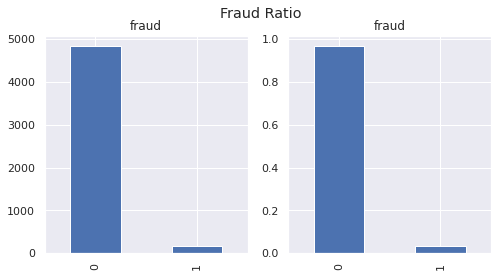

In [6]:
def shwo_category(df, col, title):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
    df[col].value_counts().plot(kind='bar', ax=axes[0], title= title, subplots=True)
    df[col].value_counts(normalize=True).plot(kind='bar', ax=axes[1], subplots=True)
    dp(df[col].value_counts())
    
shwo_category(df=df_claims, col='fraud', title='Fraud Ratio')    

#### Total Claim Amount 분포
- 중간값이 약 $33,000 정도이고, 왼쪽으로 분포가 집중됨

count      5000.000000
mean      41267.655952
std       32835.039015
min        2100.000000
25%       22335.334857
50%       33080.314843
75%       48960.167278
max      588868.568223
Name: total_claim_amount, dtype: float64

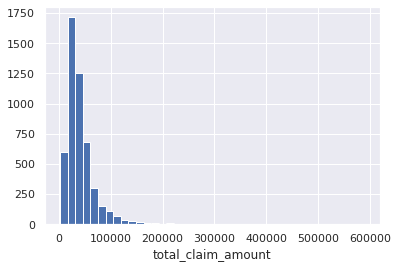

In [7]:
from IPython.display import display as dp
def show_histogram(df, col, title, bins):
    # plot the total claim amounts
    plt.hist(df[col], bins=bins)
    plt.xlabel(title)
    dp(df[col].describe())
    
show_histogram(df=df_claims, col='total_claim_amount', title='total_claim_amount', bins=40)    

## Customers 데이터 세트
- 5000 의 데이터 건수에 12개의 컬럼이 존재 합니다.

In [8]:
dp(df_customers)

,customer_age,months_as_customer,num_claims_past_year,num_insurers_past_5_years,policy_state,policy_deductable,policy_annual_premium,policy_liability,customer_zip,customer_gender,customer_education,auto_year
policy_id,,,,,,,,,,,,
1,54,94,0,1,WA,750,3000,25/50,99207,Unkown,Associate,2006
2,41,165,0,1,CA,750,2950,15/30,95632,Male,Bachelor,2012
3,57,155,0,1,CA,750,3000,15/30,93203,Female,Bachelor,2017
4,39,80,0,1,AZ,750,3000,30/60,85208,Female,Advanced Degree,2020
5,39,60,0,1,CA,750,3000,15/30,91792,Female,High School,2018
...,...,...,...,...,...,...,...,...,...,...,...,...
4996,33,4,0,3,CA,750,2550,25/50,92028,Male,Associate,2015
4997,45,150,0,1,NV,750,3000,30/60,89178,Female,Bachelor,2015
4998,28,87,0,1,CA,750,2950,25/50,91702,Male,High School,2016


#### customers 는 Non-Null Count 가 모두 5,000 입니다. 
- Null 데이터가 없다는 것을 의미 합니다.

In [9]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 1 to 5000
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   customer_age               5000 non-null   int64 
 1   months_as_customer         5000 non-null   int64 
 2   num_claims_past_year       5000 non-null   int64 
 3   num_insurers_past_5_years  5000 non-null   int64 
 4   policy_state               5000 non-null   object
 5   policy_deductable          5000 non-null   int64 
 6   policy_annual_premium      5000 non-null   int64 
 7   policy_liability           5000 non-null   object
 8   customer_zip               5000 non-null   int64 
 9   customer_gender            5000 non-null   object
 10  customer_education         5000 non-null   object
 11  auto_year                  5000 non-null   int64 
dtypes: int64(8), object(4)
memory usage: 507.8+ KB


#### 고객으로서 가입 개월 수
- 중간값이(전체 50%의 중위수) 85 개월 (6년 8개월) 입니다. 최대값이 495 로서 약 41년 정도가 됩니다.

count    5000.0000
mean       98.3446
std        71.7000
min         1.0000
25%        44.0000
50%        85.0000
75%       136.0000
max       495.0000
Name: months_as_customer, dtype: float64

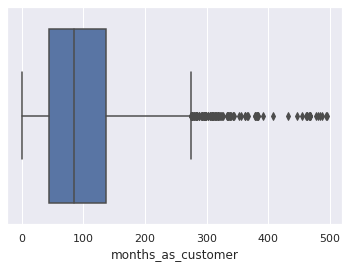

In [10]:
sns.boxplot(x=df_customers['months_as_customer']);
dp(df_customers['months_as_customer'].describe())

#### 고객의 나이 분포
- 나이의 중위수가 44 이고, 25% - 75% 는 33 - 54를 보여 주고 있습니다.

count    5000.000000
mean       44.038000
std        13.465809
min        18.000000
25%        33.000000
50%        44.000000
75%        54.000000
max        70.000000
Name: customer_age, dtype: float64

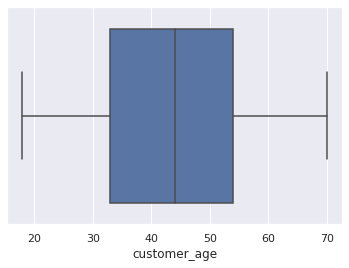

In [11]:
sns.boxplot(x=df_customers['customer_age']);
dp(df_customers['customer_age'].describe())

#### 성별 분포
- 남자와 여자가 비슷한 분포를 보이고 있습니다.

Male      2281
Female    2208
Unkown     420
Other       91
Name: customer_gender, dtype: int64

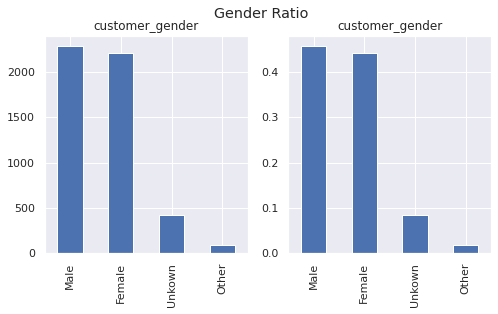

In [12]:
shwo_category(df=df_customers, col='customer_gender', title='Gender Ratio')    

#### 교육 레벨 분포
- 대학교 졸업, 고등학교 졸업이 가장 높은 비율을 보이고 있습니다.

Bachelor             2211
High School          1264
Advanced Degree       952
Associate             475
Below High School      98
Name: customer_education, dtype: int64

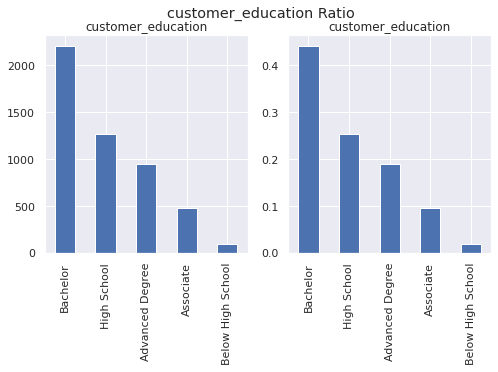

In [13]:
shwo_category(df=df_customers, col='customer_education', title='customer_education Ratio')    

#### 과거 1년 전의 보험 청구 수
- 대부부은 한번도 청구하지 않았고, 최대 6번이 가장 많음

count    5000.000000
mean        0.087800
std         0.380684
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         6.000000
Name: num_claims_past_year, dtype: float64

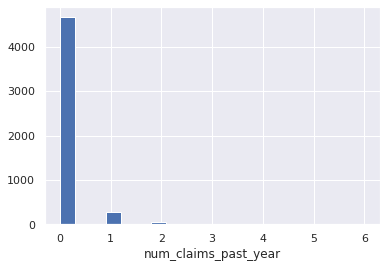

In [14]:
show_histogram(df=df_customers, col='num_claims_past_year', title='num_claims_past_year', bins=20)    

#### 과거 5년동안 가입한 보험사 숫자 분포

In [15]:
df_combined = df_customers.join(df_claims)
df_combined['num_insurers_past_5_years'].value_counts()

1    3860
2     562
3     309
4     186
5      83
Name: num_insurers_past_5_years, dtype: int64

#### 과거 5년동안 가입한 보험사 숫자 대비 Fruad 비율
- 과거 5년 동안의 보험사에 가입한 숫자가 많을 수록 Fraud 비율이 높아짐
- 차트 해석
    - 예를 들어서 num_insurers_past_5_years 가 5.0 이면, 5.0에 해당하는 고객의 12.5%가 fraud 라는 것을 의미함.
    - 위의 5년인 고객이 83명이고 12.5% 는 약 10명 임.

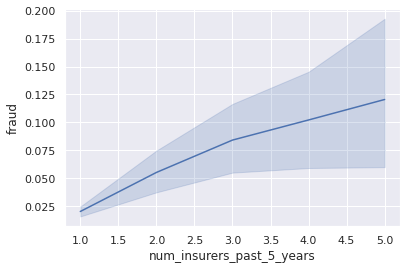

In [16]:
sns.lineplot(x='num_insurers_past_5_years', y='fraud', data=df_combined);

#### 성별에 대한 Fruad 평균 비율
- 남자가 평균적으로 여자 보다 Fruad 비율이 높은 것을 보여 주고 있음

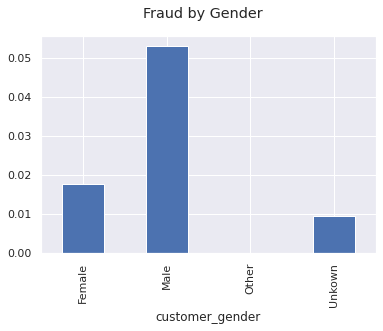

In [17]:
df_combined.groupby('customer_gender').mean()['fraud'].plot.bar()
plt.suptitle('Fraud by Gender');

### 중요 숫자형 피쳐에 대한 상관 계수 메트릭스
- fraud 와 num_insurers_past_5_years 의 상관계수는 0.14 임. (양의 상관 관계)
    - num_insurers_past_5_years 의 숫자가 늘어 날 수록 fraud 가 높게 발생한다는 것을 의미 합니다.
    - 가장 상관이 높은 피쳐로 확인 됨
- fraud 와 num_vehicles_involved 의 상관계수는 -0.09 임. (음의 상관 관계)
    - num_vehicles_involved 의 숫자가 감소 할 수록 fraud 가 높게 발생한다는 것을 의미 합니다.
    - 상식적으로 fruad 를 가장하기 위해서, 많은 차를 연관시키는 것은 어렵기 때문에 음의 상관 관계를 보이는 것이 상식적인 것 같습니다.

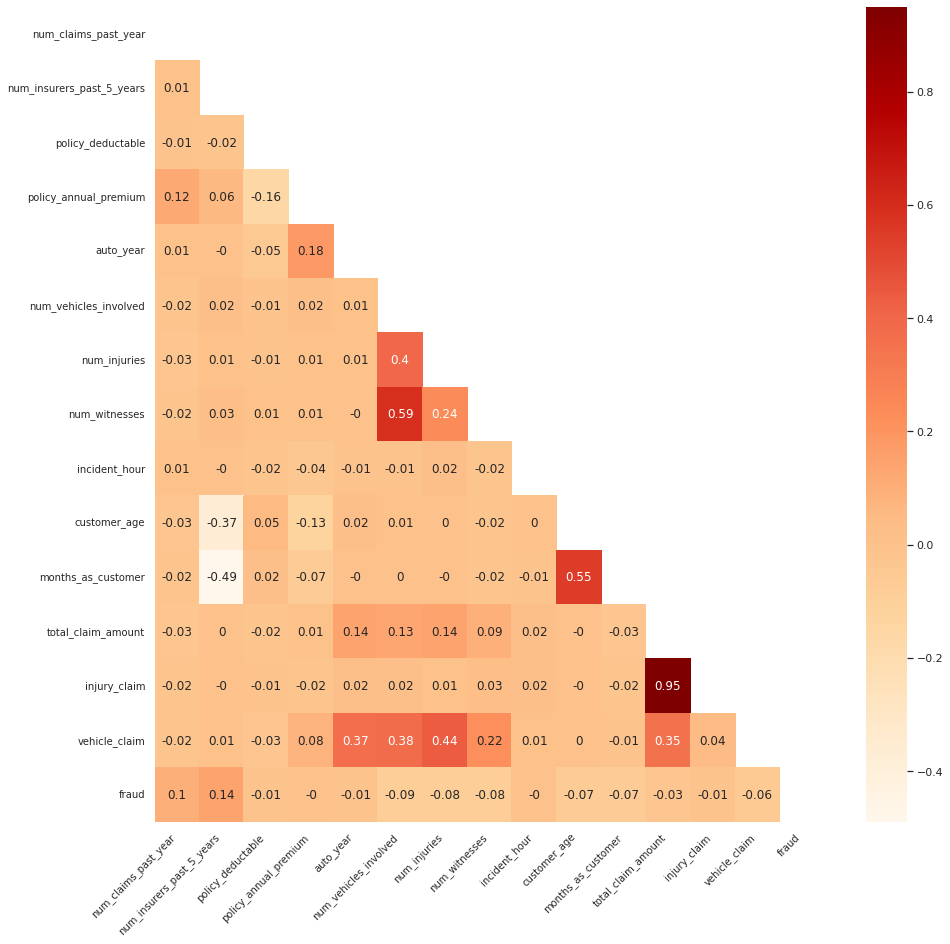

In [18]:
import matplotlib.pyplot as plt
import numpy as np

sns.set_style('white')

corr_list=['customer_gender','num_claims_past_year', 'num_insurers_past_5_years', 
           'policy_deductable','policy_annual_premium','auto_year',
           'num_vehicles_involved','num_injuries','num_witnesses','incident_hour',
           'customer_age','months_as_customer','total_claim_amount',
           'injury_claim','vehicle_claim',
           'incident_severity','fraud']



corr_df = df_combined[corr_list]
corr=round(corr_df.corr(),2)

fix, ax = plt.subplots(figsize=(15,15))

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True 

ax = sns.heatmap(corr, mask=mask, ax=ax, annot=True, cmap='OrRd')

ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=10, ha= 'right', rotation=45 )
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=10, va="center", rotation=0)

plt.show()

데이터 탐색을 마치었습니다. 이제 다음 노트북으로 이동하세요.